In [4]:
RANDOM_SEED = 42

In [5]:
path_ = "../Spectrograms"

In [6]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [7]:
#Preparing images for model training --- image size = 256 x 256
train_batch = 64
test_batch = 64
train_set= image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=train_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='training')
                                
val_set =  image_dataset_from_directory(path_,
                                labels='inferred',
                                label_mode='binary',
                                batch_size=test_batch,
                                seed=RANDOM_SEED,
                                shuffle=True,
                                validation_split=0.2,
                                subset='validation')

Found 10625 files belonging to 2 classes.
Using 8500 files for training.
Found 10625 files belonging to 2 classes.
Using 2125 files for validation.


In [8]:
test_ds_size = int(34 * 0.5) 
test_test_set = val_set.take(test_ds_size)
test_set = val_set.skip(test_ds_size)

In [9]:
val_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=34>

In [10]:
train_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=133>

In [11]:
test_set.__len__()

<tf.Tensor: shape=(), dtype=int64, numpy=17>

In [12]:
from keras.layers import Dense, Flatten
from keras.models import Sequential, Model
from keras.callbacks import ModelCheckpoint
from keras import regularizers
from livelossplot import PlotLossesKeras
from tensorflow.keras.applications.resnet50 import ResNet50

In [13]:
restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(256,256,3))
output = restnet.layers[-1].output
output = Flatten()(output)
restnet = Model(restnet.input, output)
for layer in restnet.layers:
    layer.trainable = False
restnet.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 262, 262, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 128, 128, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [14]:
model_1 = Sequential()

model_1.add(restnet)
model_1.add(Dense(128,activation='relu', input_dim=(256,256,3), kernel_regularizer=regularizers.L2(0.001)))
model_1.add(Dense(64,activation='relu', kernel_regularizer=regularizers.L2(0.001)))
model_1.add(Dense(1,activation='sigmoid'))

model_1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy','Recall','Precision','AUC'])    # ['accuracy','Recall','Precision','AUC']

In [15]:
filepath = "Models/TL-resnet-model-checkpoints/H-TL-l2-01-resnet-model-t3.h5"

callbacks = [ModelCheckpoint(filepath=filepath, monitor="val_accuracy", mode='max', save_best_only=True),
            PlotLossesKeras()]

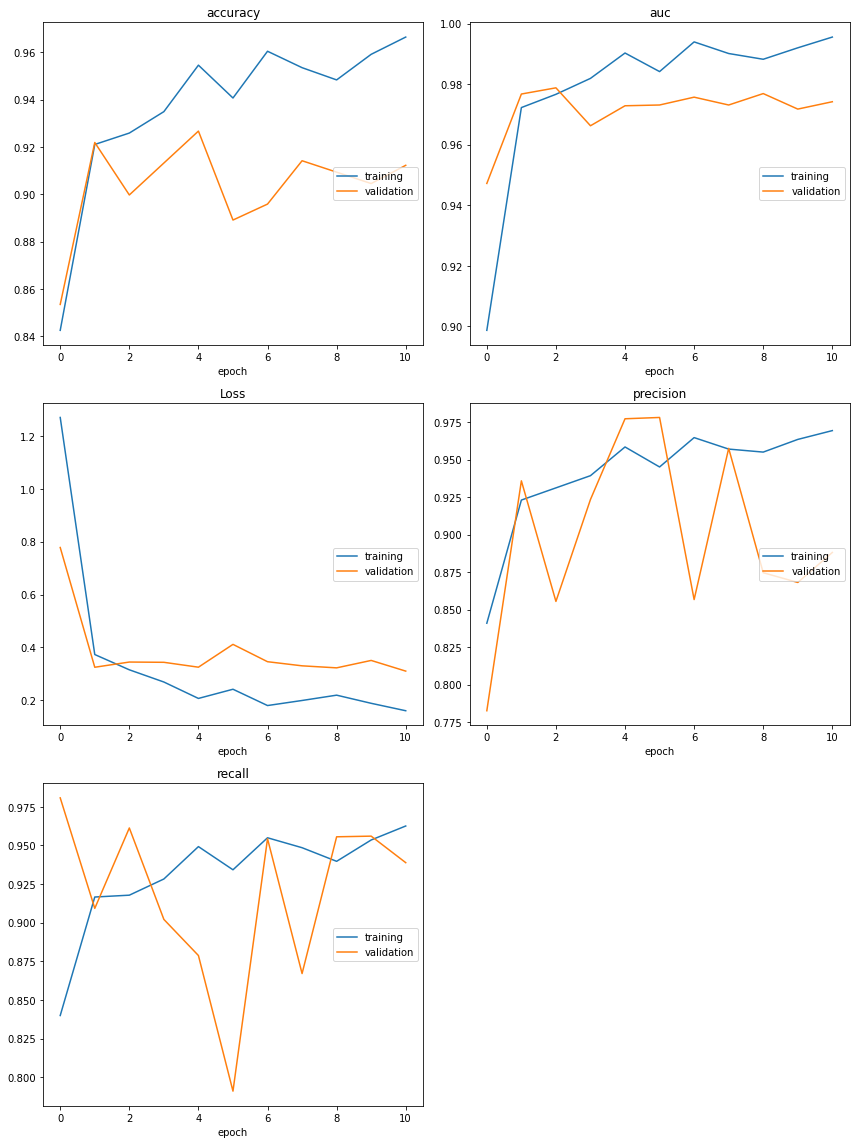

accuracy
	training         	 (min:    0.842, max:    0.966, cur:    0.966)
	validation       	 (min:    0.853, max:    0.927, cur:    0.912)
auc
	training         	 (min:    0.899, max:    0.996, cur:    0.996)
	validation       	 (min:    0.947, max:    0.979, cur:    0.974)
Loss
	training         	 (min:    0.161, max:    1.270, cur:    0.161)
	validation       	 (min:    0.311, max:    0.778, cur:    0.311)
precision
	training         	 (min:    0.841, max:    0.969, cur:    0.969)
	validation       	 (min:    0.783, max:    0.978, cur:    0.888)
recall
	training         	 (min:    0.840, max:    0.963, cur:    0.963)
	validation       	 (min:    0.791, max:    0.981, cur:    0.939)
133/133 [==============================] - 165s 1s/step - loss: 0.1609 - accuracy: 0.9665 - recall: 0.9626 - precision: 0.9693 - auc: 0.9955 - val_loss: 0.3107 - val_accuracy: 0.9122 - val_recall: 0.9389 - val_precision: 0.8881 - val_auc: 0.9742
Epoch 12/25
 11/133 [=>............................] - ETA:

KeyboardInterrupt: 

In [16]:
h = model_1.fit(train_set,
                epochs=25,
                validation_data=test_set,
                callbacks=callbacks
                )

In [18]:
model_1.evaluate(test_test_set)

17/17 [==============================] - 6s 314ms/step - loss: 0.3855 - accuracy: 0.9036 - recall: 0.9502 - precision: 0.8759 - auc: 0.9723


[0.38548916578292847,
 0.9035679697990417,
 0.9501845240592957,
 0.8758503198623657,
 0.9722595810890198]

In [ ]:
model_1.save('Models/H-test-TL-resnet-l2-output-t1.h5')